# OPI ANALYTICS 

# Examen Data Scientist por Nayib Ahued

## Sección A

 Datos abiertos de la CDMX
La Agencia Digital de Innovación Pública tiene disponibles los datos georeferenciados de las carpetas de investigación ​aportados por la PGJ​. La tabla está disponible aquí: https://datos.cdmx.gob.mx/explore

1) ¿Qué pruebas identificarías para asegurar la calidad de estos datos? No es necesario hacerlas. Sólo describe la prueba y qué te dice cada una.

- Identificar las columnas y el tipo de dato que manejan: df.info()
- Eliminar filas que contienen NaN en todas sus celdas: df.dropna(how='all')
- Con la siguiente función se determina el total de los valores NaN en cada columna: df.isna().sum()
- Si se considera que alguna columna es inservible por falta de información se elimina: df.drop(['Columna'], axis=1, inplace=True)
- Conocer los tipos de datos que quedan en el dataframe: df.dtypes
- En caso de querer modificar algun dtype de alguna columna: df.astype('float')
- Otro ejemplo de cambio de dtype pudiera ser el de la función: to_datetime
- Para conocer datos estadistícos de las columnas numéricas: df.describe()
- Para no contar con redundancias se revisa la coorelación de las columnas por medio de un heatmap con seaborn: sns.heatmap(df.corr());


2) ¿Cuántos delitos registrados hay en la tabla? ¿Qué rango de tiempo consideran los datos?

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt


In [2]:
%%time
#exportando las carpetas de la pgj
carpetas= pd.read_csv('/Users/nayibahued/Desktop/OPI_ANALYTICS/carpetas-de-investigacion-pgj-de-la-ciudad-de-mexico.csv')

CPU times: user 5.94 s, sys: 642 ms, total: 6.58 s
Wall time: 7.82 s


In [3]:
carpetas.head(5)

,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,alcaldia_hechos,colonia_hechos,ao_inicio,mes_inicio,fecha_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
0,2016.0,Abril,2016-04-30 19:30:00,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-4,UI-3SD,IZTAPALAPA,AMPLIACIÓN SINATEL,2016,Mayo,2016-05-01 00:16:29,CALLE CENTRAL TELEFONICA,MUNICIPIO LIBRE,-99.129255,19.366206,"19.3662059998,-99.129255"
1,2016.0,Abril,2016-04-30 23:15:00,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN AZCAPOTZALCO,AZ-2,UI-3CD,AZCAPOTZALCO,PETROLERA,2016,Mayo,2016-05-01 00:24:31,CALLE RENACIMIENTO CON EJE 3 SAN ISIDRO,NaN,-99.203309,19.483821,"19.4838209998,-99.203309"
2,2016.0,Abril,2016-04-30 18:00:00,DENUNCIA DE HECHOS,HECHO NO DELICTIVO,INVESTIGACIÓN PARA LA ATENCIÓN DE DELITOS SEXU...,FDS-6,FDS-6-03,CUAUHTEMOC,DOCTORES,2016,Mayo,2016-05-01 00:55:30,CASA HABITACION,VERTIZ 1329 DEPTO 7,-99.147374,19.419659,"19.4196589998,-99.147374"
3,2016.0,Abril,2016-04-30 12:30:00,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-3,UI-3SD,BENITO JUAREZ,PORTALES SUR,2016,Mayo,2016-05-01 01:03:30,MONROVIA,PRESIDENTES,-99.149600,19.367232,"19.3672319998,-99.1496"
4,2016.0,Abril,2016-04-30 16:10:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-2SD,IZTAPALAPA,ÁLVARO OBREGÓN,2016,Mayo,2016-05-01 01:21:44,MANUEL ESCANDON,deje el punto en la colonia,-99.035695,19.372810,"19.3728099998,-99.035695"


In [4]:
carpetas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081451 entries, 0 to 1081450
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ao_hechos             1081038 non-null  float64
 1   mes_hechos            1081038 non-null  object 
 2   fecha_hechos          1081291 non-null  object 
 3   delito                1081451 non-null  object 
 4   categoria_delito      1081451 non-null  object 
 5   fiscalia              1081451 non-null  object 
 6   agencia               1081451 non-null  object 
 7   unidad_investigacion  1081224 non-null  object 
 8   alcaldia_hechos       1078349 non-null  object 
 9   colonia_hechos        1037562 non-null  object 
 10  ao_inicio             1081451 non-null  int64  
 11  mes_inicio            1081451 non-null  object 
 12  fecha_inicio          1081451 non-null  object 
 13  calle_hechos          1078615 non-null  object 
 14  calle_hechos2         428286 non-n

In [5]:
carpetas.dropna(how='all') #no hay alguna fila completamente vacía

,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,alcaldia_hechos,colonia_hechos,ao_inicio,mes_inicio,fecha_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
0,2016.0,Abril,2016-04-30 19:30:00,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-4,UI-3SD,IZTAPALAPA,AMPLIACIÓN SINATEL,2016,Mayo,2016-05-01 00:16:29,CALLE CENTRAL TELEFONICA,MUNICIPIO LIBRE,-99.129255,19.366206,"19.3662059998,-99.129255"
1,2016.0,Abril,2016-04-30 23:15:00,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN AZCAPOTZALCO,AZ-2,UI-3CD,AZCAPOTZALCO,PETROLERA,2016,Mayo,2016-05-01 00:24:31,CALLE RENACIMIENTO CON EJE 3 SAN ISIDRO,NaN,-99.203309,19.483821,"19.4838209998,-99.203309"
2,2016.0,Abril,2016-04-30 18:00:00,DENUNCIA DE HECHOS,HECHO NO DELICTIVO,INVESTIGACIÓN PARA LA ATENCIÓN DE DELITOS SEXU...,FDS-6,FDS-6-03,CUAUHTEMOC,DOCTORES,2016,Mayo,2016-05-01 00:55:30,CASA HABITACION,VERTIZ 1329 DEPTO 7,-99.147374,19.419659,"19.4196589998,-99.147374"
3,2016.0,Abril,2016-04-30 12:30:00,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-3,UI-3SD,BENITO JUAREZ,PORTALES SUR,2016,Mayo,2016-05-01 01:03:30,MONROVIA,PRESIDENTES,-99.149600,19.367232,"19.3672319998,-99.1496"
4,2016.0,Abril,2016-04-30 16:10:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-2SD,IZTAPALAPA,ÁLVARO OBREGÓN,2016,Mayo,2016-05-01 01:21:44,MANUEL ESCANDON,deje el punto en la colonia,-99.035695,19.372810,"19.3728099998,-99.035695"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081446,2020.0,Julio,2020-07-30 22:20:00,DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO V...,DELITO DE BAJO IMPACTO,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN ALVAR...,AO-4,UI-1SD,ALVARO OBREGON,CORPUS CHRISTY,2020,Julio,2020-07-31 01:56:41,MOCTEZUMA,NaN,-99.248102,19.358526,"19.3585263,-99.2481017357"
1081447,2020.0,Julio,2020-07-29 06:00:00,ROBO DE ACCESORIOS DE AUTO,DELITO DE BAJO IMPACTO,UNIDAD DE RECEPCIÓN POR INTERNET,CEN-1,Unidad de Investigación 1 S/D,VENUSTIANO CARRANZA,LORENZO BOTURINI,2020,Julio,2020-07-31 02:50:05,CUITLAHUAC,AV. DEL TALLER,-99.127366,19.413535,"19.4135346298,-99.1273656203"
1081448,2020.0,Julio,2020-07-11 16:35:00,ROBO DE MOTOCICLETA SIN VIOLENCIA,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN CUAJI...,CJ-1,UI-1SD,CUAJIMALPA DE MORELOS,SAN JOSÉ DE LOS CEDROS,2020,Julio,2020-07-31 03:03:25,JULIAN ADAME,ALCANFORES,-99.285001,19.369276,"19.3692761775,-99.2850008268"
1081449,2020.0,Julio,2020-07-31 01:57:00,ROBO DE ACCESORIOS DE AUTO,DELITO DE BAJO IMPACTO,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN CUAUH...,CUH-2,UI-1CD,CUAUHTEMOC,ROMA NORTE,2020,Julio,2020-07-31 03:16:55,GUANAJUATO,FRONTERA,-99.155508,19.417578,"19.4175782365,-99.1555083505"


In [6]:
#Revisemos el porcentaje de datos faltantes
carpetas.isnull().sum()/carpetas.shape[0] *100
#Los resultados nos hablan de falta de datos en la 2da calle de los hechos ocurridos, si bien 
#podría considerarse un porcentaje alto, el de la primera calle se encuentra en un rango aceptable

ao_hechos                0.038189
mes_hechos               0.038189
fecha_hechos             0.014795
delito                   0.000000
categoria_delito         0.000000
fiscalia                 0.000000
agencia                  0.000000
unidad_investigacion     0.020990
alcaldia_hechos          0.286837
colonia_hechos           4.058344
ao_inicio                0.000000
mes_inicio               0.000000
fecha_inicio             0.000000
calle_hechos             0.262240
calle_hechos2           60.397096
longitud                 3.964304
latitud                  3.964304
geopoint                 3.964304
dtype: float64

In [7]:
#Revisando las alcaldías para comprobar que pertenezcan a la cdmx
carpetas['alcaldia_hechos'].unique()
#Con este apartado se demuestra que evidentemente existen casos fuera de la ciudad

array(['IZTAPALAPA', 'AZCAPOTZALCO', 'CUAUHTEMOC', 'BENITO JUAREZ',
       'ALVARO OBREGON', 'VENUSTIANO CARRANZA', 'TLALPAN',
       'MIGUEL HIDALGO', 'GUSTAVO A MADERO', 'COYOACAN',
       'CUAJIMALPA DE MORELOS', 'XOCHIMILCO', nan, 'IZTACALCO',
       'LA MAGDALENA CONTRERAS', 'TLAHUAC', 'TEPETLAOXTOC',
       'ECATEPEC DE MORELOS', 'MILPA ALTA', 'TECAMAC',
       'ZAPOTLAN DE JUAREZ', 'CHALCO', 'GUANAJUATO', 'NEZAHUALCOYOTL',
       'NAUCALPAN DE JUAREZ', 'TOLUCA', 'NICOLAS ROMERO', 'APIZACO',
       'TLALNEPANTLA DE BAZ', 'LEON', 'LA PAZ', 'VILLA DE ZAACHILA',
       'LERMA', 'TLANEPANTLA', 'CUAUTEPEC', 'DURANGO', 'HUIXQUILUCAN',
       'ZACATECAS', 'POZA RICA DE HIDALGO', 'ZAPOPAN',
       'CUAUTITLAN IZCALLI', 'PINAL DE AMOLES',
       'VALLE DE CHALCO SOLIDARIDAD', 'MONTERREY', 'CUITLAHUAC',
       'MEXICALI', 'IXTAPALUCA', 'CUERNAVACA', 'JOJUTLA', 'MIGUEL ALEMAN',
       'FELIPE CARRILLO PUERTO', 'XALAPA', 'VERACRUZ',
       'IXCATEOPAN DE CUAUHTEMOC', 'TUXPAM', 'OCOYOACAC', '

In [8]:
#Definiendo la lista de alcaldias de la ciudad
alcaldias_cdmx=["ALVARO OBREGON","AZCAPOTZALCO","BENITO JUAREZ","COYOACAN","CUAJIMALPA","CUAUHTEMOC",
                       "GUSTAVO A MADERO","IZTACALCO","IZTAPALAPA","MAGDALENA CONTRERAS","MIGUEL HIDALGO",
                       "MILPA ALTA","TLAHUAC","TLALPAN","VENUSTIANO CARRANZA","XOCHIMILCO"]


In [9]:
#filtrando el dataframe con las alcaldias exclusivas de la cdmx
carpetas_cdmx = carpetas.loc[carpetas["alcaldia_hechos"].isin(alcaldias_cdmx)]

In [10]:
carpetas_cdmx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037667 entries, 0 to 1081450
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ao_hechos             1037277 non-null  float64
 1   mes_hechos            1037277 non-null  object 
 2   fecha_hechos          1037522 non-null  object 
 3   delito                1037667 non-null  object 
 4   categoria_delito      1037667 non-null  object 
 5   fiscalia              1037667 non-null  object 
 6   agencia               1037667 non-null  object 
 7   unidad_investigacion  1037446 non-null  object 
 8   alcaldia_hechos       1037667 non-null  object 
 9   colonia_hechos        1005470 non-null  object 
 10  ao_inicio             1037667 non-null  int64  
 11  mes_inicio            1037667 non-null  object 
 12  fecha_inicio          1037667 non-null  object 
 13  calle_hechos          1035247 non-null  object 
 14  calle_hechos2         414126 non-n

In [11]:
delitos=carpetas_cdmx['ao_hechos'].count()
primer_año=carpetas_cdmx['ao_inicio'].min()
ultimo_año=carpetas_cdmx['ao_inicio'].max()
primer_mes=carpetas_cdmx['mes_hechos'].loc[0]
ultimo_mes=carpetas_cdmx.loc[carpetas_cdmx.index[-1], "mes_hechos"]

2) RESPUESTA

In [12]:
print('El número total de delitos es de',delitos)
print("")
print('El rango de tiempo transcurre desde',primer_mes,'de',primer_año,'hasta',ultimo_mes,'de',ultimo_año)

El número total de delitos es de 1037277

El rango de tiempo transcurre desde Abril de 2016 hasta Julio de 2020


In [13]:
ultimo_mes

'Julio'

3) ¿Cómo se distribuye el número de delitos en la CDMX? ¿Cuáles son los 5 delitos más frecuentes?

In [14]:
carpetas_cdmx.head()

,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,alcaldia_hechos,colonia_hechos,ao_inicio,mes_inicio,fecha_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
0,2016.0,Abril,2016-04-30 19:30:00,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-4,UI-3SD,IZTAPALAPA,AMPLIACIÓN SINATEL,2016,Mayo,2016-05-01 00:16:29,CALLE CENTRAL TELEFONICA,MUNICIPIO LIBRE,-99.129255,19.366206,"19.3662059998,-99.129255"
1,2016.0,Abril,2016-04-30 23:15:00,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN AZCAPOTZALCO,AZ-2,UI-3CD,AZCAPOTZALCO,PETROLERA,2016,Mayo,2016-05-01 00:24:31,CALLE RENACIMIENTO CON EJE 3 SAN ISIDRO,NaN,-99.203309,19.483821,"19.4838209998,-99.203309"
2,2016.0,Abril,2016-04-30 18:00:00,DENUNCIA DE HECHOS,HECHO NO DELICTIVO,INVESTIGACIÓN PARA LA ATENCIÓN DE DELITOS SEXU...,FDS-6,FDS-6-03,CUAUHTEMOC,DOCTORES,2016,Mayo,2016-05-01 00:55:30,CASA HABITACION,VERTIZ 1329 DEPTO 7,-99.147374,19.419659,"19.4196589998,-99.147374"
3,2016.0,Abril,2016-04-30 12:30:00,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-3,UI-3SD,BENITO JUAREZ,PORTALES SUR,2016,Mayo,2016-05-01 01:03:30,MONROVIA,PRESIDENTES,-99.149600,19.367232,"19.3672319998,-99.1496"
4,2016.0,Abril,2016-04-30 16:10:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-2SD,IZTAPALAPA,ÁLVARO OBREGÓN,2016,Mayo,2016-05-01 01:21:44,MANUEL ESCANDON,deje el punto en la colonia,-99.035695,19.372810,"19.3728099998,-99.035695"


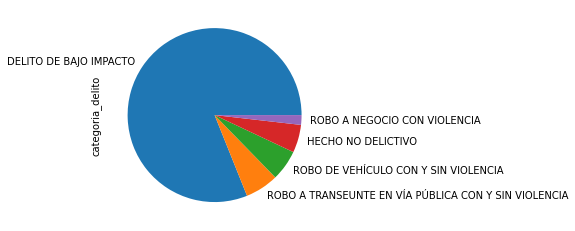

In [18]:
#Para la primera pregunta me parece idoneo mostrar la distribución de categoria de delitos
carpetas_cdmx['categoria_delito'].value_counts().head(5).plot(kind='pie')
plt.savefig('categoria_delito.png')

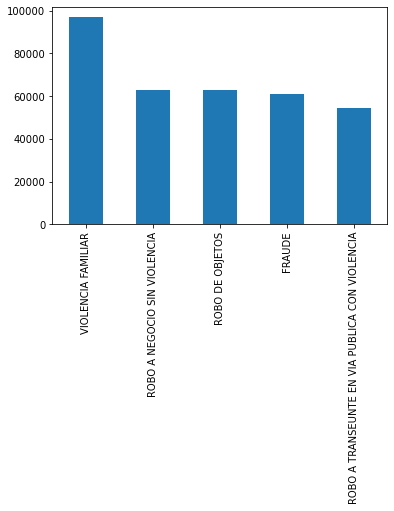

In [19]:
#En la segunda pregunta se pide los 5 delitos específicos más frecuentes
carpetas_cdmx['delito'].value_counts().head(5).plot(kind='bar')
plt.savefig('top5_delitos.png')

4) Identifica los delitos que van a la alza y a la baja en la CDMX en el último año (ten cuidado con los delitos con pocas ocurrencias).

In [21]:
#Analizaremos los delitos cometidos por bimestre en 2019.
delitos_febrero=carpetas_cdmx[carpetas_cdmx.ao_hechos.isin([2019]) & carpetas_cdmx.mes_hechos.isin(['Febrero'])]
delitos_abril=carpetas_cdmx[carpetas_cdmx.ao_hechos.isin([2019]) & carpetas_cdmx.mes_hechos.isin(['Abril'])]
delitos_junio=carpetas_cdmx[carpetas_cdmx.ao_hechos.isin([2019]) & carpetas_cdmx.mes_hechos.isin(['Junio'])]
delitos_agosto=carpetas_cdmx[carpetas_cdmx.ao_hechos.isin([2019]) & carpetas_cdmx.mes_hechos.isin(['Agosto'])]
delitos_octubre=carpetas_cdmx[carpetas_cdmx.ao_hechos.isin([2019]) & carpetas_cdmx.mes_hechos.isin(['Octubre'])]
delitos_diciembre=carpetas_cdmx[carpetas_cdmx.ao_hechos.isin([2019]) & carpetas_cdmx.mes_hechos.isin(['Diciembre'])]

In [22]:
delitos_febrero['delito'].value_counts().head(10)


VIOLENCIA FAMILIAR                                       1692
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA           1401
ROBO A NEGOCIO SIN VIOLENCIA                             1251
FRAUDE                                                   1018
AMENAZAS                                                 1009
ROBO DE OBJETOS                                           905
ROBO DE ACCESORIOS DE AUTO                                733
ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA     553
ROBO A CASA HABITACION SIN VIOLENCIA                      492
ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO               480
Name: delito, dtype: int64

In [23]:
febrero=delitos_febrero['delito'].value_counts().head(10)
abril=delitos_abril['delito'].value_counts().head(10)
junio=delitos_junio['delito'].value_counts().head(10)
agosto=delitos_agosto['delito'].value_counts().head(10)
octubre=delitos_octubre['delito'].value_counts().head(10)
diciembre=delitos_diciembre['delito'].value_counts().head(10)

In [24]:
meses={'febrero':febrero,'abril':abril,'junio':junio,'agosto':agosto,'octubre':octubre,'diciembre':diciembre}
m=pd.DataFrame(meses)
m

,febrero,abril,junio,agosto,octubre,diciembre
AMENAZAS,1009.0,1096.0,1076.0,1112.0,1201.0,1054.0
FRAUDE,1018.0,1044.0,1074.0,1091.0,1108.0,911.0
NARCOMENUDEO POSESION SIMPLE,NaN,NaN,NaN,572.0,NaN,NaN
"PRODUCCIÓN, IMPRESIÓN, ENAJENACIÓN, DISTRIBUCIÓN, ALTERACIÓN O FALSIFICACIÓN DE TÍTULOS AL PORTADOR, DOCUMENTOS DE CRÉDITO PÚBLICOS O VALES DE CANJE",NaN,NaN,493.0,NaN,NaN,NaN
ROBO A CASA HABITACION SIN VIOLENCIA,492.0,477.0,NaN,NaN,460.0,453.0
ROBO A NEGOCIO SIN VIOLENCIA,1251.0,1305.0,1207.0,1278.0,1295.0,1164.0
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,1401.0,1240.0,1038.0,1066.0,1004.0,866.0
ROBO DE ACCESORIOS DE AUTO,733.0,715.0,715.0,663.0,620.0,567.0
ROBO DE OBJETOS,905.0,978.0,988.0,1094.0,1038.0,844.0
ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,480.0,470.0,578.0,586.0,549.0,501.0


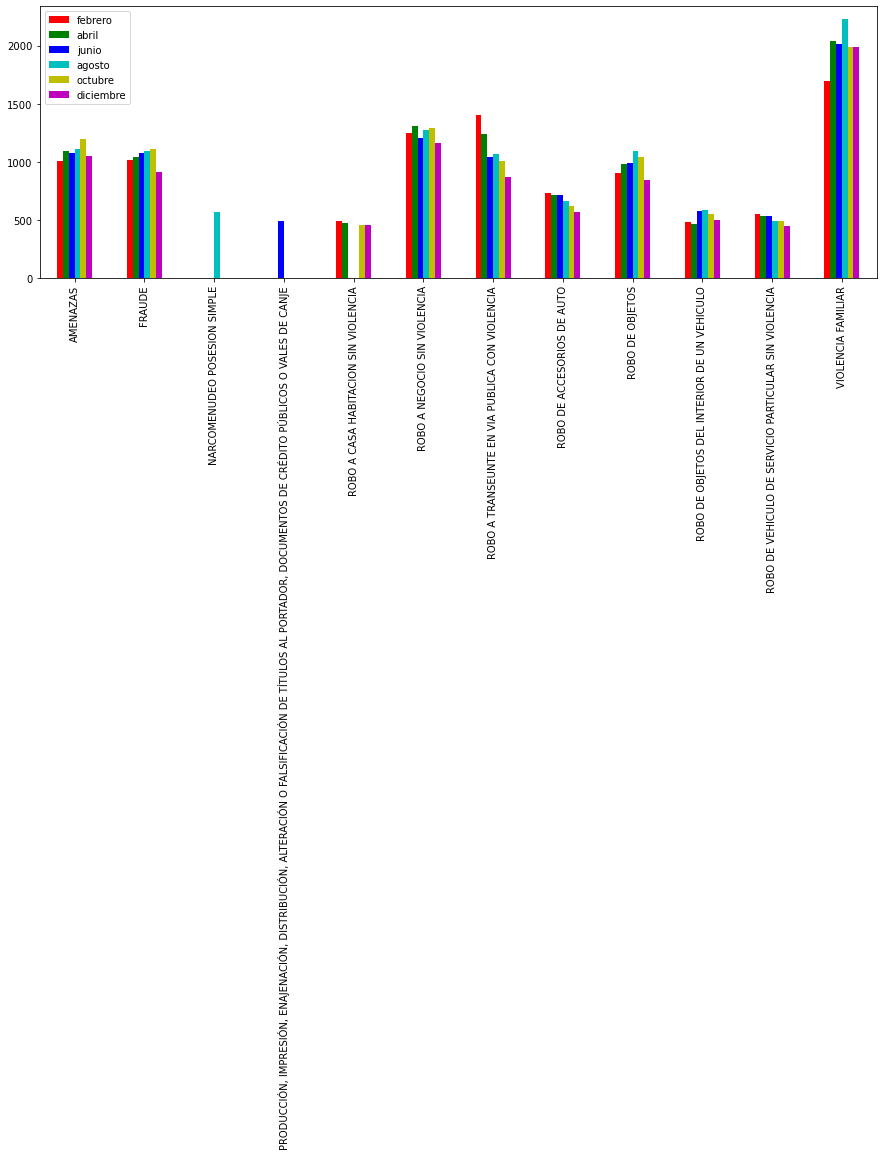

In [39]:
#Se tomaron los delitos más cometidos en cada mes
clr=('rgbcym')
m.plot.bar(figsize=(15,5),rot=90,color=clr)
plt.savefig('delitos_alza_baja.png',dpi=100)
plt.show();
#En esta gráfica se puede apreciar la evolución de las incidencias delictivas a lo largo del 2019, al final se nota 
#que en total son 12 los crímenes más frecuentes en el año


5) ¿Cuál es la alcaldía que más delitos tiene y cuál es la que menos?. ¿Por qué crees que sea esto?

In [28]:
#Para fines prácticos se agregará un valor numerico de 1 a cada delito que funcionará para utilizar la función de count
#unida con groupby

carpetas_cdmx['count']=1
carpetas_cdmx.head()

<ipython-input-28-b85022b8439f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carpetas_cdmx['count']=1


,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,alcaldia_hechos,colonia_hechos,ao_inicio,mes_inicio,fecha_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint,count
0,2016.0,Abril,2016-04-30 19:30:00,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-4,UI-3SD,IZTAPALAPA,AMPLIACIÓN SINATEL,2016,Mayo,2016-05-01 00:16:29,CALLE CENTRAL TELEFONICA,MUNICIPIO LIBRE,-99.129255,19.366206,"19.3662059998,-99.129255",1
1,2016.0,Abril,2016-04-30 23:15:00,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN AZCAPOTZALCO,AZ-2,UI-3CD,AZCAPOTZALCO,PETROLERA,2016,Mayo,2016-05-01 00:24:31,CALLE RENACIMIENTO CON EJE 3 SAN ISIDRO,NaN,-99.203309,19.483821,"19.4838209998,-99.203309",1
2,2016.0,Abril,2016-04-30 18:00:00,DENUNCIA DE HECHOS,HECHO NO DELICTIVO,INVESTIGACIÓN PARA LA ATENCIÓN DE DELITOS SEXU...,FDS-6,FDS-6-03,CUAUHTEMOC,DOCTORES,2016,Mayo,2016-05-01 00:55:30,CASA HABITACION,VERTIZ 1329 DEPTO 7,-99.147374,19.419659,"19.4196589998,-99.147374",1
3,2016.0,Abril,2016-04-30 12:30:00,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-3,UI-3SD,BENITO JUAREZ,PORTALES SUR,2016,Mayo,2016-05-01 01:03:30,MONROVIA,PRESIDENTES,-99.149600,19.367232,"19.3672319998,-99.1496",1
4,2016.0,Abril,2016-04-30 16:10:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-2SD,IZTAPALAPA,ÁLVARO OBREGÓN,2016,Mayo,2016-05-01 01:21:44,MANUEL ESCANDON,deje el punto en la colonia,-99.035695,19.372810,"19.3728099998,-99.035695",1


In [29]:
crimen_alc = carpetas_cdmx.groupby('alcaldia_hechos').count()['count']
cri_alc={'Número de delitos':crimen_alc}
c_a=pd.DataFrame(cri_alc)

In [30]:
c_a=c_a.sort_values(by='Número de delitos', ascending=False)
print("Delitos por alcaldia")
c_a

Delitos por alcaldia


,Número de delitos
alcaldia_hechos,
CUAUHTEMOC,170940
IZTAPALAPA,162469
GUSTAVO A MADERO,108085
BENITO JUAREZ,91470
ALVARO OBREGON,72407
COYOACAN,72039
MIGUEL HIDALGO,70935
TLALPAN,63076
VENUSTIANO CARRANZA,62448


In [31]:
print("La alcaldía con más delitos cometidos es",c_a.index[0],"con un total de",c_a['Número de delitos'][0],
      "mientras que la alcaldía con menos incidencia delictiva es",c_a.index[-1],"con un total de",c_a['Número de delitos'][-1],"delitos.")
print("")
print("La alcaldía Cuauhtemóc cuenta con la gran particularidad -a parte de ser bastante céntrica- de poseer una diversidad enorme en términos socioeconómicos"
     "esto se refiere a que encontramos desde el Barrio Bravo de Tepito, hasta los grandes rascacielos y centros de negocio"
     "de Paso de la Reforma, además de contar con zonas turísticas y de vida nocturna bastante prolíficas, esto provoca"
     "entre otras cosas un flujo constante de dinero que desemboca en la presencia tanto de crimen organizado como crimen común."
     " Por otra parte, la alcaldía de Milpa Alta se encuentra lejos del centro de la ciudad, en la zona más al sur de la ciudad,"
     "es practicamente una zona rural con un díficil acceso, y además da hogar a un sector de la población de clase obrera"
     "que se distribuye en el resto de la ciudad para reaizar sus actividades diarias.")



La alcaldía con más delitos cometidos es CUAUHTEMOC con un total de 170940 mientras que la alcaldía con menos incidencia delictiva es MILPA ALTA con un total de 7261 delitos.

La alcaldía Cuauhtemóc cuenta con la gran particularidad -a parte de ser bastante céntrica- de poseer una diversidad enorme en términos socioeconómicosesto se refiere a que encontramos desde el Barrio Bravo de Tepito, hasta los grandes rascacielos y centros de negociode Paso de la Reforma, además de contar con zonas turísticas y de vida nocturna bastante prolíficas, esto provocaentre otras cosas un flujo constante de dinero que desemboca en la presencia tanto de crimen organizado como crimen común. Por otra parte, la alcaldía de Milpa Alta se encuentra lejos del centro de la ciudad, en la zona más al sur de la ciudad,es practicamente una zona rural con un díficil acceso, y además da hogar a un sector de la población de clase obreraque se distribuye en el resto de la ciudad para reaizar sus actividades diarias.


6) Dentro de cada alcaldía, cuáles son las tres colonias con más delitos

In [32]:
colonia_3 = carpetas_cdmx.groupby(['alcaldia_hechos','colonia_hechos']).agg({'count':sum})
colonia_3


count
alcaldia_hechos colonia_hechos                     
ALVARO OBREGON  19 DE MAYO                       52
                1A AMPLIACIÓN PRESIDENTES       353
                1A VICTORIA                     266
                1ER REACOMODO CORPUS CHRISTI     36
                2A AMPLIACIÓN EL PIRU           140
...                                             ...
XOCHIMILCO      VASO DE REGULACION               78
                VILLA DE LA NORIA                 2
                XOCHIMILCO                       44
                XOCHIPILLI                       71
                ZACATEPEC(SAN MATEO XALPA)      155

[1684 rows x 1 columns]

In [33]:
agrupar = colonia_3['count'].groupby(level=0, group_keys=False)
top3 = agrupar.apply(lambda i:i.sort_values(ascending=False).head(3))
top3

alcaldia_hechos      colonia_hechos                  
ALVARO OBREGON       JARDINES DEL PEDREGAL                3276
                     SAN ANGEL                            2630
                     ZEDEC SANTA FE                       2504
AZCAPOTZALCO         EL ROSARIO                           3740
                     INDUSTRIAL VALLEJO                   2466
                     CENTRO DE AZCAPOTZALCO               2280
BENITO JUAREZ        DEL VALLE CENTRO                    16129
                     NARVARTE                            11769
                     PORTALES SUR                         5977
COYOACAN             PEDREGAL DE SANTO DOMINGO            6192
                     AJUSCO                               3336
                     PEDREGAL DE SANTA URSULA             3260
CUAUHTEMOC           CENTRO                              36526
                     DOCTORES                            21319
                     ROMA NORTE                          13262
G

7) ¿Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, día de la
semana, quincenas)?

In [34]:
#El dataframe no cuenta con el registro completo para 2020, para tener un conteo fidedigno, se tomarán en cuenta
#los datos de los años que poseen un registro mensual completo
carpetas_completas = carpetas_cdmx[carpetas_cdmx['ao_hechos']!=2020]


In [35]:
#Se hace el conteo mensual de delitos en el periodo propuesto de 3 años

In [36]:
ene=carpetas_completas[carpetas_completas.mes_hechos.isin(['Enero'])]
feb=carpetas_completas[carpetas_completas.mes_hechos.isin(['Febrero'])]
mar=carpetas_completas[carpetas_completas.mes_hechos.isin(['Marzo'])]
abr=carpetas_completas[carpetas_completas.mes_hechos.isin(['Abril'])]
may=carpetas_completas[carpetas_completas.mes_hechos.isin(['Mayo'])]
jun=carpetas_completas[carpetas_completas.mes_hechos.isin(['Junio'])]
jul=carpetas_completas[carpetas_completas.mes_hechos.isin(['Julio'])]
ago=carpetas_completas[carpetas_completas.mes_hechos.isin(['Agosto'])]
sep=carpetas_completas[carpetas_completas.mes_hechos.isin(['Septiembre'])]
octu=carpetas_completas[carpetas_completas.mes_hechos.isin(['Octubre'])]
nov=carpetas_completas[carpetas_completas.mes_hechos.isin(['Noviembre'])]
dic=carpetas_completas[carpetas_completas.mes_hechos.isin(['Diciembre'])]

mes={'enero':ene['count'].value_counts(),'febrero':feb['count'].value_counts(),'marzo':mar['count'].value_counts(),
     'abril':abr['count'].value_counts(),'mayo':may['count'].value_counts(),'junio':jun['count'].value_counts(),
     'agosto':ago['count'].value_counts(),'septiembre':sep['count'].value_counts(),'octubre':octu['count'].value_counts(),
     'noviembre':nov['count'].value_counts(),'diciembre':dic['count'].value_counts()}
ms=pd.DataFrame(mes)
ms=ms.rename(index={1:'delitos'})
msa=ms.T




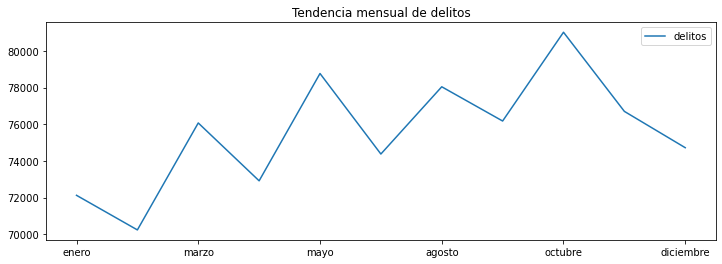

Se puede apreciar que la tendencia aumenta a mediados del año, y sube progresivamente a la época de frío,reduciendose en la época navideña y a inicios del año.


In [38]:
msa.plot.line(figsize=(12,4))
plt.title("Tendencia mensual de delitos")
plt.savefig('tendencia_delito.png', dpi=100)
plt.show()
print("Se puede apreciar que la tendencia aumenta a mediados del año, y sube progresivamente a la época de frío," 
      "reduciendose en la época navideña y a inicios del año.")
#plt.savefig('tendencia_delito.png')

8) ¿Cuales son los delitos que más caracterizan a cada alcaldía? Es decir, delitos que suceden con mayor frecuencia en una alcaldía y con menor frecuencia en las demás.

In [40]:
#Se utiliza practicamente el mismo proceso que se utilizó para medir la cantidad de delitos por colonia
del_3 = carpetas_cdmx.groupby(['alcaldia_hechos','delito']).agg({'count':sum})
del_3


count
alcaldia_hechos delito                                                   
ALVARO OBREGON  ABANDONO DE PERSONA                                   141
                ABORTO                                                 65
                ABUSO DE AUTORIDAD                                    155
                ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PU...    218
                ABUSO DE CONFIANZA                                   1183
...                                                                   ...
XOCHIMILCO      VIOLACION EQUIPARADA POR CONOCIDO                       2
                VIOLACION EQUIPARADA Y ROBO DE VEHICULO                 1
                VIOLACION TUMULTUARIA                                   6
                VIOLACION TUMULTUARIA EQUIPARADA POR CONOCIDO           1
                VIOLENCIA FAMILIAR                                   5277

[3740 rows x 1 columns]

In [41]:
agr=del_3["count"].groupby(level=0, group_keys=False) 
mayor=agr.apply(lambda i: i.sort_values(ascending=False)[:1])
print('Delito sucedido con mayor facilidad')
mayor

Delito sucedido con mayor facilidad


alcaldia_hechos      delito            
ALVARO OBREGON       VIOLENCIA FAMILIAR     7635
AZCAPOTZALCO         VIOLENCIA FAMILIAR     4875
BENITO JUAREZ        FRAUDE                 8708
COYOACAN             VIOLENCIA FAMILIAR     6720
CUAUHTEMOC           FRAUDE                16442
GUSTAVO A MADERO     VIOLENCIA FAMILIAR    11816
IZTACALCO            VIOLENCIA FAMILIAR     6253
IZTAPALAPA           VIOLENCIA FAMILIAR    19078
MIGUEL HIDALGO       FRAUDE                 6217
MILPA ALTA           VIOLENCIA FAMILIAR     1592
TLAHUAC              VIOLENCIA FAMILIAR     4410
TLALPAN              VIOLENCIA FAMILIAR     7797
VENUSTIANO CARRANZA  VIOLENCIA FAMILIAR     5838
XOCHIMILCO           VIOLENCIA FAMILIAR     5277
Name: count, dtype: int64

In [42]:
menor=agr.apply(lambda i: i.sort_values(ascending=True)[:1])
print('Delito sucedido con menor facilidad')
menor

Delito sucedido con menor facilidad


alcaldia_hechos      delito                                                   
ALVARO OBREGON       ROBO EN INTERIOR DE EMPRESA (NOMINA) CON VIOLENCIA           1
AZCAPOTZALCO         ROBO A SUCURSAL BANCARIA (SUPERMERCADO) CON VIOLENCIA        1
BENITO JUAREZ        USO INDEBIDO DE CONDECORACIONES UNIFORMES E INSIGNIAS        1
COYOACAN             EXPLOTACIÓN DE MENOR O DISCAPACITADO                         1
CUAUHTEMOC           LESIONES INTENCIONALES Y ROBO DE VEHICULO                    1
GUSTAVO A MADERO     REGULACIÓN URBANA                                            1
IZTACALCO            ROBO A TRANSEUNTE EN HOTEL CON VIOLENCIA                     1
IZTAPALAPA           ROBO DE VEHICULO EN PENSION, TALLER Y AGENCIAS S/V           1
MIGUEL HIDALGO       ROBO A SUCURSAL BANCARIA SIN VIOLENCIA                       1
MILPA ALTA           FEMINICIDIO POR DISPARO DE ARMA DE FUEGO                     1
TLAHUAC              ROBO EN INTERIOR DE EMPRESA (NOMINA) CON VIOLENCIA          

9) Calcula el número de homicidios dolosos por cada 100 mil habitantes anual para cada
Área Geoestadística Básica (AGEB) del INEGI. (hint: no importa que el dato de población no esté actualizado).


In [43]:
hom = carpetas_cdmx[carpetas_cdmx.categoria_delito.isin(['HOMICIDIO DOLOSO'])]
homicidios = hom.groupby("alcaldia_hechos").count()
homicidios['muerto por cada 100mil hab']=homicidios['count']/100000
hom_100k_hab=homicidios['muerto por cada 100mil hab']

In [44]:
hom_100k_hab=hom_100k_hab.sort_values()

Homicidios Dolosos por cada 100 mil habitantes


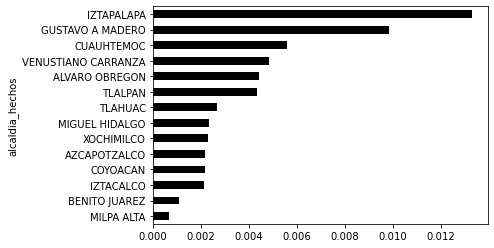

In [46]:
print("Homicidios Dolosos por cada 100 mil habitantes")
hom_100k_hab.plot.barh(color='k')
plt.savefig('homicidios.png',dp1=100)
plt.show();


10) ¿Cómo diseñarías un indicador que midiera el nivel “inseguridad”? Diséñalo al nivel de
desagregación que te parezca más adecuado (ej. manzana, calle, AGEB, etc.).

In [47]:
#Del top3 de colonias tomar las 10 colonias con más delitos
top10=top3.sort_values(ascending=False)[:10]

Las 10 colonias con mayor indice delictivo


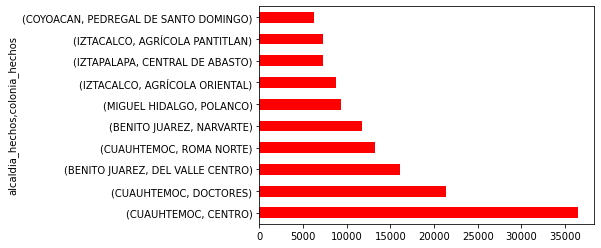

In [48]:
print("Las 10 colonias con mayor indice delictivo")
top10.plot.barh(color='r')
plt.savefig('indice.pdf',dp1=100)

plt.show();

Al ser necesario un envoirnment distinto para utilizar el Pyspark, la sección B y C se encuentra en otro notebook.